In [ ]:
#In this project, the goal was to classify messages into two categories: spam and ham (non-spam). 
#The dataset consisted of a collection of labeled messages, where each message was categorized as either spam or ham.

In [43]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [44]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [45]:
# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"

In [46]:
data = pd.read_csv(url, sep='\t', header=None, names=["label","message"])

In [47]:
# display dataset
print(data.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [48]:
# Convert labels to binary (ham = 0, spam = 1)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [49]:
# Display basic stats
print("Dataset Summary:")
print(data['label'].value_counts())

Dataset Summary:
label
0    4825
1     747
Name: count, dtype: int64


In [50]:
# Step 2: Generate Word Clouds
spam_messages = " ".join(data[data['label'] == 1]['message'])
ham_messages = " ".join(data[data['label'] == 0]['message'])

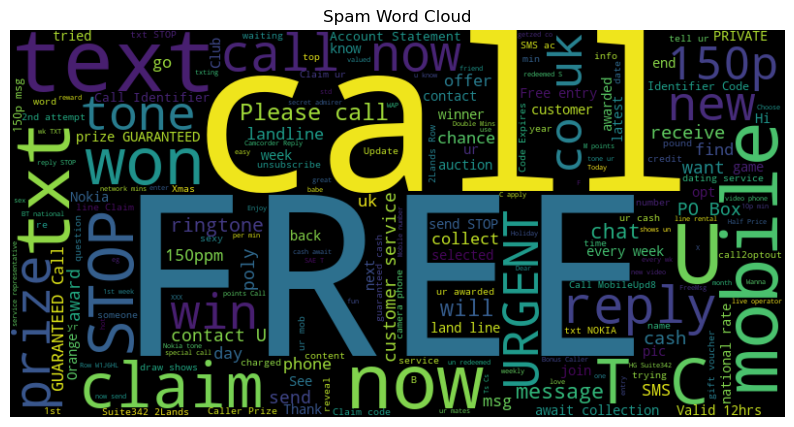

In [51]:
# Spam Word Cloud
plt.figure(figsize=(10, 6))
wordcloud_spam = WordCloud(width=800, height=400,
background_color='black').generate(spam_messages)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.title("Spam Word Cloud")
plt.show()

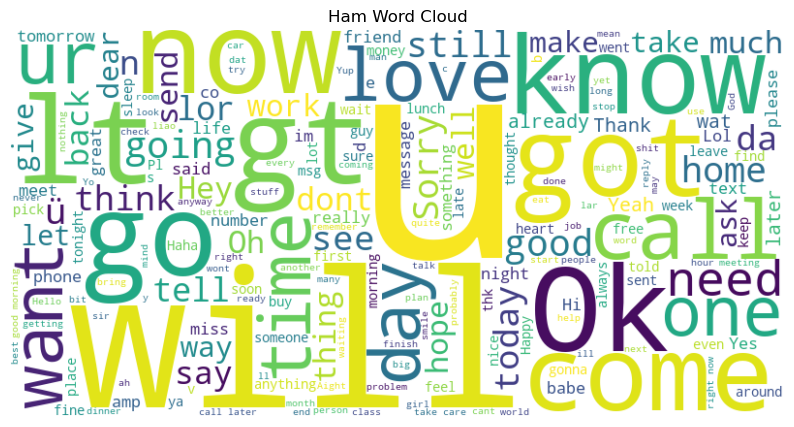

In [52]:
# Ham (Non-Spam) Word Cloud
plt.figure(figsize=(10, 6))
wordcloud_ham = WordCloud(width=800, height=400,
background_color='white').generate(ham_messages)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis("off")
plt.title("Ham Word Cloud")
plt.show()

In [53]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(data['message'],data['label'], test_size=0.2, random_state=42)

In [54]:
# Step 4: Convert text to numerical data using TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [55]:
#Step 5: Train a Logistic Regression Classifier
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [56]:
# Step 6: Evaluate the Model
y_pred = model.predict(X_test_tfidf)

In [57]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


In [58]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



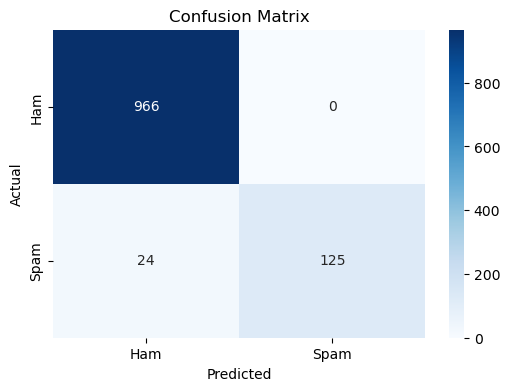

In [59]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Conclusion:The project demonstrated the ability of Logistic Regression to effectively classify messages into spam and ham categories based on textual features. 
#The model was able to achieve a reasonable level of accuracy in distinguishing between the two classes, with clear differences in the word usage patterns observed in the word clouds.